In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_8857/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
import keras
import matplotlib.pyplot as plt

fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return x > 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(s):
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [4]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activation='relu'):
        self.layer_sizes = layer_sizes
        self.activation, self.activation_derivative = self.set_activation_functions(activation)
        self.parameters = self.initialize_parameters()

    def set_activation_functions(self, activation):
        if activation == 'relu':
            return relu, relu_derivative
        elif activation == 'sigmoid':
            return sigmoid, sigmoid_derivative
        elif activation == 'tanh':
            return tanh, tanh_derivative
        else:
            raise ValueError("Unsupported activation function")
            
    def initialize_parameters(self):
        parameters = {}
        for l in range(1, len(self.layer_sizes)):
            parameters['W' + str(l)] = np.random.randn(self.layer_sizes[l], self.layer_sizes[l-1]) * 0.01
            parameters['b' + str(l)] = np.zeros((self.layer_sizes[l], 1))
        return parameters
    
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
    
    def compute_loss(self, Y, Y_hat):
        m = Y.shape[1]
        loss = -np.sum(Y * np.log(Y_hat + 1e-9)) / m
        return loss
    
    def forward_propagation(self, X):
        caches = {}
        H = X
        L = len(self.parameters) // 2
        
        for l in range(1, L):
            H_prev = H
            A = np.dot(self.parameters['W' + str(l)], H_prev) + self.parameters['b' + str(l)]
            H = self.activation(A) 
            caches['A' + str(l)] = A
            caches['H' + str(l)] = H
        
        AL = np.dot(self.parameters['W' + str(L)], H) + self.parameters['b' + str(L)]
        HL = self.softmax(AL)
        caches['A' + str(L)] = AL
        caches['H' + str(L)] = HL
        return HL, caches
    
    def backpropagation(self, X, Y, caches):
        grads = {}
        L = len(self.parameters) // 2 # Number of layers
        m = X.shape[1]
        Y = Y.reshape(caches['H' + str(L)].shape) # Ensure same shape as output layer

        # Initializing backpropagation and Output layer gradient
        dAL = caches['H' + str(L)] - Y
        grads["dW" + str(L)] = 1./m * np.dot(dAL, caches['H' + str(L-1)].T)
        grads["db" + str(L)] = 1./m * np.sum(dAL, axis=1, keepdims=True)

        for l in reversed(range(1, L)):
            dH = np.dot(self.parameters["W" + str(l+1)].T, dAL) # dH_prev
            dA = self.activation_derivative(caches['A' + str(l)]) * dH # Element wise multiplication between 2 vectors # <-----------------------------------------
            if l > 1:
                grads["dW" + str(l)] = 1./m * np.dot(dA, caches['H' + str(l-1)].T)
            else: # For the first hidden layer, use X as A0
                grads["dW" + str(l)] = 1./m * np.dot(dA, X.T)
            grads["db" + str(l)] = 1./m * np.sum(dA, axis=1, keepdims=True)
            dAL = dA  # For the next iteration. Prepare dAL for next layer (if not the first layer)

        return grads
    
    def update_parameters(self, grads, learning_rate):
        L = len(self.parameters) // 2
        for l in range(L):
            self.parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
            self.parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]

In [5]:
def convert_labels_to_one_hot(labels, classes):
    return np.eye(classes)[labels].T

def preprocess_data(train_images, train_labels, test_images, test_labels):
    X_train = train_images.reshape(train_images.shape[0], -1).T / 255.
    X_test = test_images.reshape(test_images.shape[0], -1).T / 255.
    
    Y_train = convert_labels_to_one_hot(train_labels, 10)
    Y_test = convert_labels_to_one_hot(test_labels, 10)
    
    return X_train, Y_train, X_test, Y_test  

def plot_training_loss_and_test_acc(epochs, traing_loss, test_accuracy):
    epochs_range = list(range(0, epochs))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs_range, traing_loss, label='Training Loss')
    plt.plot(epochs_range, test_accuracy, label='Test Accuracy')
    plt.title('Training Loss and Test Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()  

Epoch 0, Training loss: 2.301969
Test accuracy : 0.1375

Epoch 1, Training loss: 2.301784
Test accuracy : 0.1395

Epoch 2, Training loss: 2.301600
Test accuracy : 0.1418

Epoch 3, Training loss: 2.301416
Test accuracy : 0.1453

Epoch 4, Training loss: 2.301233
Test accuracy : 0.1479

Epoch 5, Training loss: 2.301049
Test accuracy : 0.1504

Epoch 6, Training loss: 2.300865
Test accuracy : 0.152

Epoch 7, Training loss: 2.300682
Test accuracy : 0.1546

Epoch 8, Training loss: 2.300498
Test accuracy : 0.1586

Epoch 9, Training loss: 2.300314
Test accuracy : 0.1628

Epoch 10, Training loss: 2.300130
Test accuracy : 0.1679

Epoch 11, Training loss: 2.299946
Test accuracy : 0.173

Epoch 12, Training loss: 2.299761
Test accuracy : 0.1781

Epoch 13, Training loss: 2.299576
Test accuracy : 0.1838

Epoch 14, Training loss: 2.299390
Test accuracy : 0.1886

Epoch 15, Training loss: 2.299204
Test accuracy : 0.1952

Epoch 16, Training loss: 2.299017
Test accuracy : 0.2003

Epoch 17, Training loss: 2

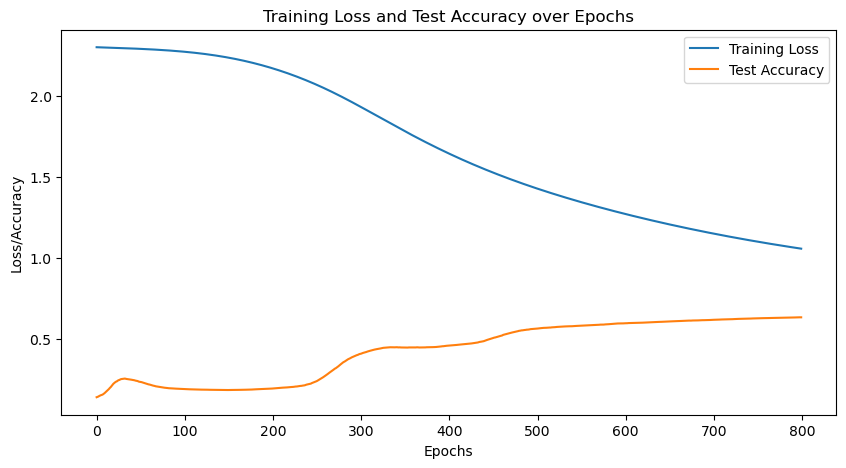

In [9]:
def train(X_train, Y_train, X_test, Y_test, epochs=10, learning_rate=0.01, activation='relu'):
    np.random.seed(1) 
    nn = NeuralNetwork([X_train.shape[0], 64, 10], activation)
    traing_loss, test_accuracy = [], []
    
    for epoch in range(epochs):
        HL, caches = nn.forward_propagation(X_train)
        loss = nn.compute_loss(Y_train, HL)
        grads = nn.backpropagation(X_train, Y_train, caches)
        nn.update_parameters(grads, learning_rate)
        
        if epoch % 1 == 0:
            print("Epoch %i, Training loss: %f" % (epoch, loss))
    
            # Evaluate model on whole test data after each epoch
            predictions, _ = nn.forward_propagation(X_test)
            accuracy = np.mean(np.argmax(predictions, axis=0) == np.argmax(Y_test, axis=0))
            print(f"Test accuracy : {accuracy}\n")

            traing_loss.append(loss)
            test_accuracy.append(accuracy)
    
    plot_training_loss_and_test_acc(epochs, traing_loss, test_accuracy)
X_train, Y_train, X_test, Y_test = preprocess_data(train_images, train_labels, test_images, test_labels)
train(X_train, Y_train, X_test, Y_test, epochs=800, activation='relu', learning_rate=0.01)